In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/processed/data_clean.csv')
df['Data'] = pd.to_datetime(df['Data'])

df.head()

,ID,Data,Produto,Categoria,Quantidade,Preco,Valor_Total
0,2,2023-05-21,Mouse Gamer,Acessórios,8,136.34,1090.72
1,3,2023-11-14,Fone Bluetooth,Acessórios,6,139.82,838.92
2,5,2023-09-19,Notebook HP,Informática,6,4145.99,24875.94
3,6,2023-05-24,Webcam HD,Acessórios,4,196.77,787.08
4,7,2023-01-13,iPhone,Telefonia,8,4415.75,35326.00


# Tendência de Vendas Mensais

Vendas por Mês (qte)
Data
2023-01-31    253
2023-02-28    300
2023-03-31    227
2023-04-30    316
2023-05-31    321
2023-06-30    377
2023-07-31    432
2023-08-31    311
2023-09-30    348
2023-10-31    357
2023-11-30    277
2023-12-31    352
Freq: ME, Name: Quantidade, dtype: int64


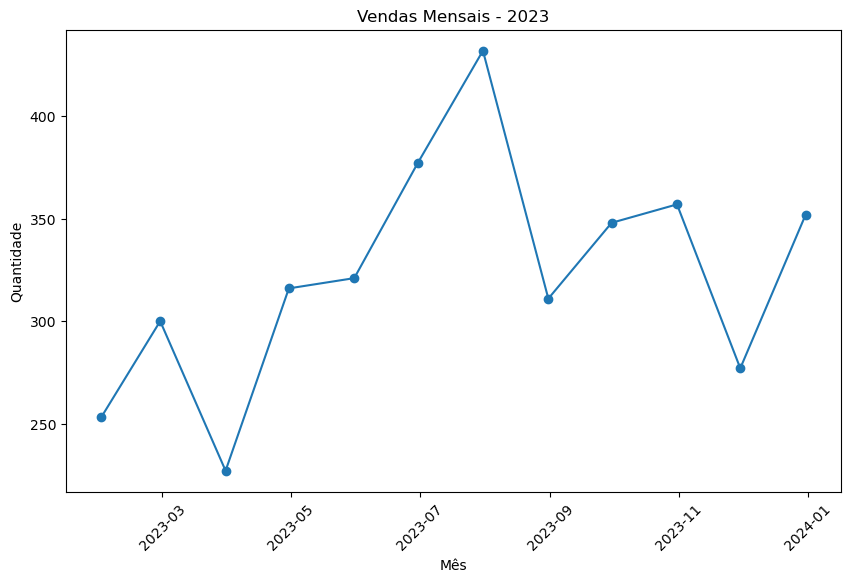

In [20]:
# Calculando vendas mensais por quantidade
vendas_mensais = df.groupby(pd.Grouper(key='Data', freq='ME'))['Quantidade'].sum()
print("Vendas por Mês (qte)")
print(vendas_mensais)

# Gráfico de linha 
plt.figure(figsize=(10, 6))
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o')
plt.title('Vendas Mensais - 2023')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

Vendas por Mês (R$)
Data
2023-01-31    393041.63
2023-02-28    440169.31
2023-03-31    256942.58
2023-04-30    659686.30
2023-05-31    458272.20
2023-06-30    716811.78
2023-07-31    802439.33
2023-08-31    446305.32
2023-09-30    674674.31
2023-10-31    510763.24
2023-11-30    602708.60
2023-12-31    726589.73
Freq: ME, Name: Valor_Total, dtype: float64


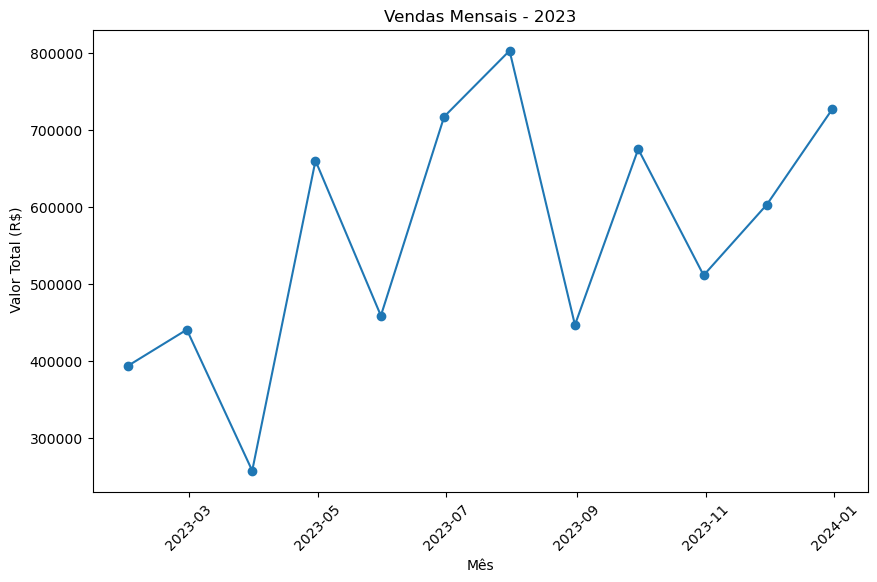

In [ ]:
# Calculando vendas mensais por valor total
vendas_mensais_ = df.groupby(pd.Grouper(key='Data', freq='ME'))['Valor_Total'].sum()
print("Vendas por Mês (R$)")
print(vendas_mensais_)

# Gráfico de linha 
plt.figure(figsize=(10, 6))
plt.plot(vendas_mensais_.index, vendas_mensais_.values, marker='o')
plt.title('Vendas Mensais - 2023')
plt.xlabel('Mês')
plt.ylabel(' Valor Total (R$)')
plt.xticks(rotation=45)
plt.show()

# Identificando mais insights 

Top 5 Produtos mais vendidos:
Produto
Teclado Wireless      548
Notebook HP           481
Fone Bluetooth        412
Webcam HD             412
Smartphone Samsung    401
Name: Quantidade, dtype: int64


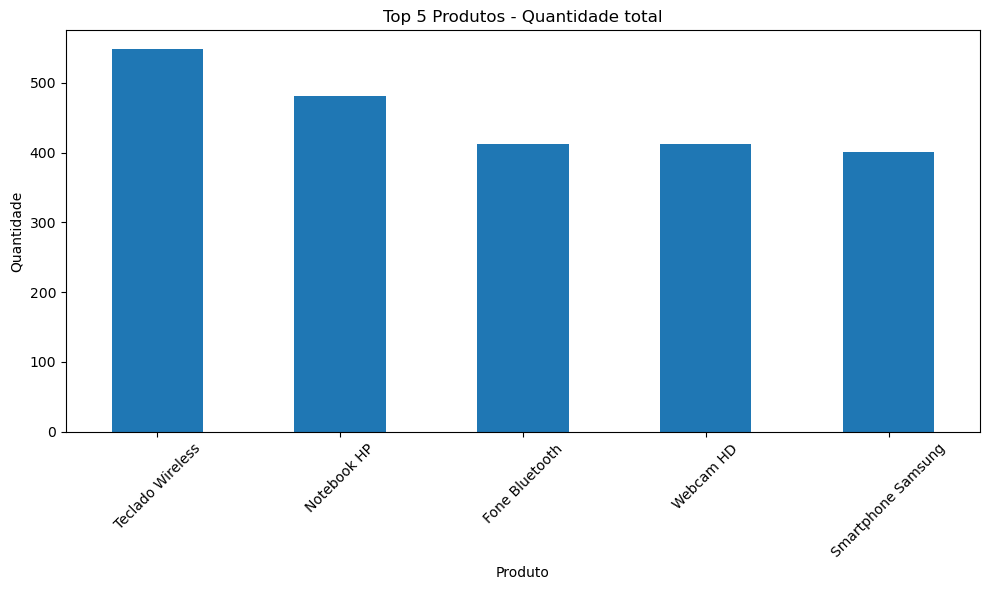

In [15]:
# Insight 1: Top 5 Produtos mais vendidos
print("Top 5 Produtos mais vendidos:")
top_produtos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head()
print(top_produtos)

# Visualização do Insight 1
plt.figure(figsize=(10, 6))
top_produtos.plot(kind='bar')
plt.title('Top 5 Produtos - Quantidade total')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()

Top 5 Produtos por Valor Total de Vendas:
Produto
Notebook HP           1854422.63
iPhone                1621296.20
Notebook Dell         1500382.80
Smartphone Samsung    1013757.92
Monitor 24"            385438.77
Name: Valor_Total, dtype: float64


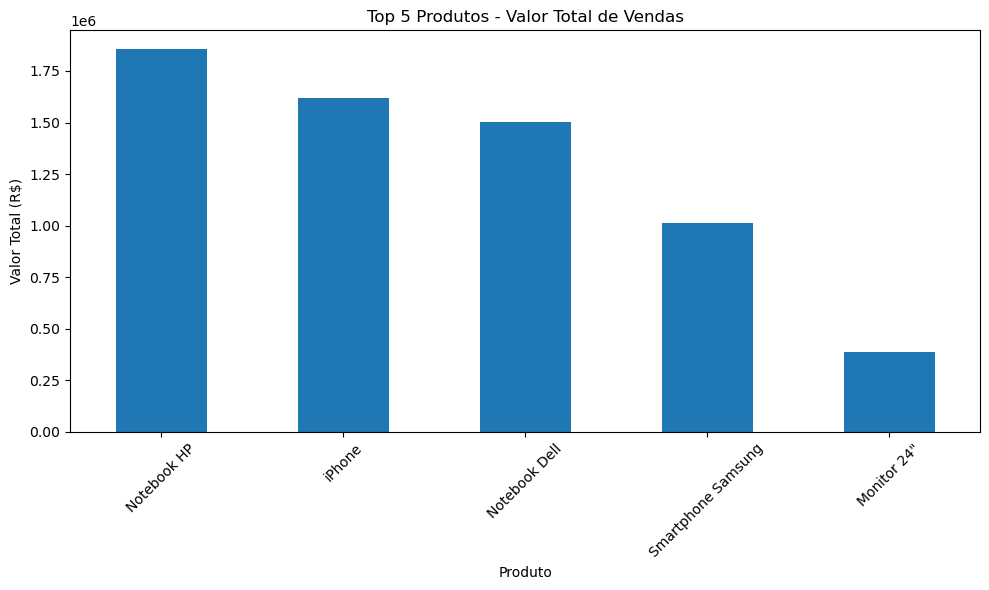

In [29]:
# Insight 2: Top 5 Produtos que mais geraram retorno
print("Top 5 Produtos por Valor Total de Vendas:")
top_produtos = df.groupby('Produto')['Valor_Total'].sum().sort_values(ascending=False).head()
print(top_produtos)

# Visualização do Insight 1
plt.figure(figsize=(10, 6))
top_produtos.plot(kind='bar')
plt.title('Top 5 Produtos - Valor Total de Vendas')
plt.xlabel('Produto')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()

Vendas Totais por Categoria:
Categoria
Acessórios      313106.01
Informática    3740244.20
Telefonia      2635054.12
Name: Valor_Total, dtype: float64


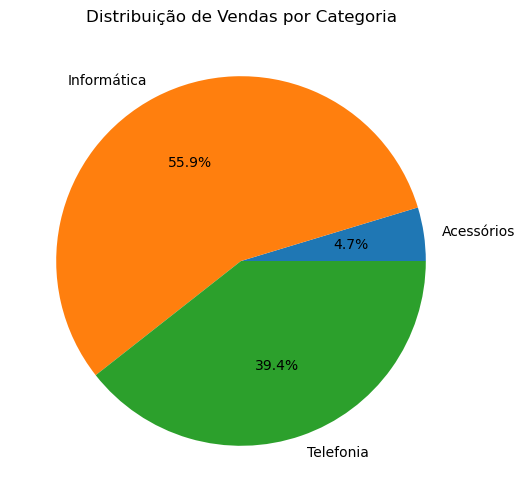

In [21]:
# Insight 2: Vendas por Categoria
print("Vendas Totais por Categoria:")
vendas_categoria = df.groupby('Categoria')['Valor_Total'].sum()
print(vendas_categoria)

# Visualização do Insight 2 utilizando PIE chart
plt.figure(figsize=(8, 6))
vendas_categoria.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Vendas por Categoria')
plt.ylabel('')
plt.show()

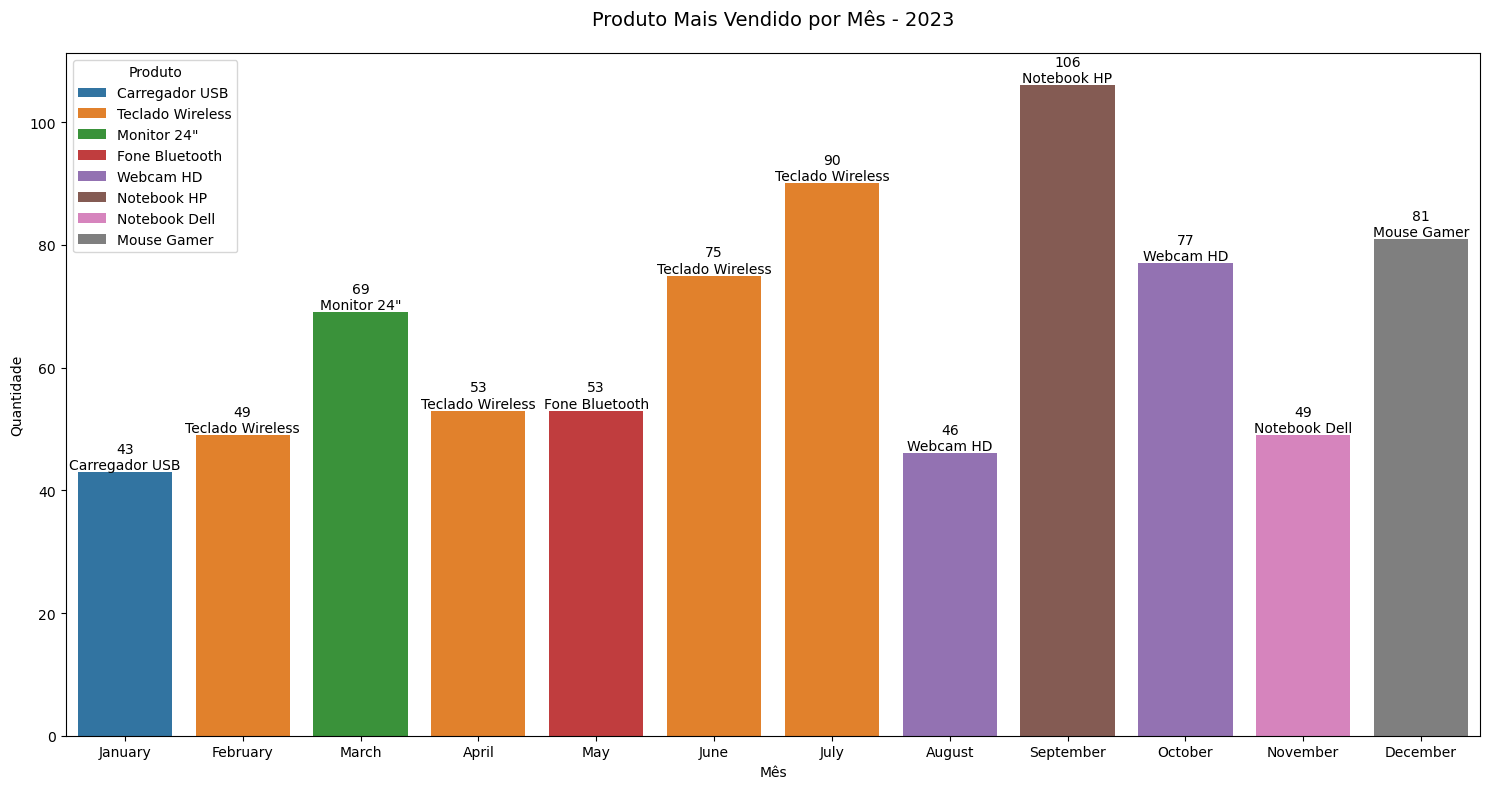

In [26]:
# Produtos Mais Vendidos cada Mês

vendas_mensais_produto = df.groupby([pd.Grouper(key='Data', freq='ME'),'Produto'])['Quantidade'].sum().reset_index()

# Encontrando o produto mais vendido para cada mês
produtos_top_mes = vendas_mensais_produto.loc[vendas_mensais_produto.groupby('Data')['Quantidade'].idxmax()]

plt.figure(figsize=(15, 8))
sns.barplot(
    data=produtos_top_mes,
    x=produtos_top_mes['Data'].dt.strftime('%B'),  # Nome do mês
    y='Quantidade',
    hue='Produto',)
plt.title('Produto Mais Vendido por Mês - 2023', pad=20, size=14)
plt.xlabel('Mês')

# Adicionando valores nas barras
for i, row in enumerate(produtos_top_mes.itertuples()):
    plt.text(
        i, 
        row.Quantidade,
        f'{row.Quantidade:,.0f}\n{row.Produto}',
        ha='center',
        va='bottom'
    )
plt.tight_layout()

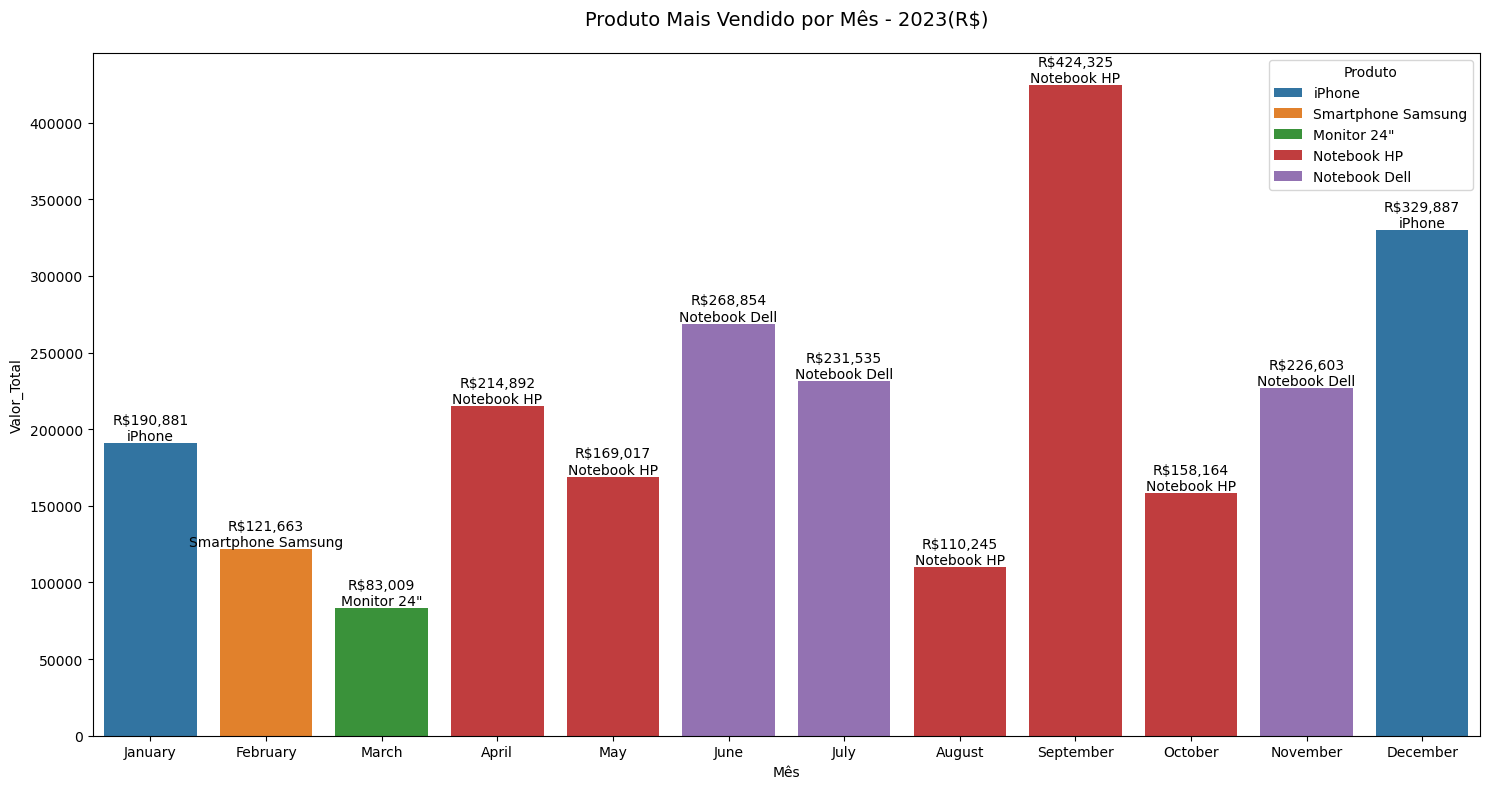

In [25]:
# Produtos que geraram mais R$ por em cada mês 

vendas_mensais_produto = df.groupby([pd.Grouper(key='Data', freq='ME'),'Produto'])['Valor_Total'].sum().reset_index()

# Encontrando o produto mais vendido para cada mês
produtos_top_mes = vendas_mensais_produto.loc[vendas_mensais_produto.groupby('Data')['Valor_Total'].idxmax()]

plt.figure(figsize=(15, 8))
sns.barplot(
    data=produtos_top_mes,
    x=produtos_top_mes['Data'].dt.strftime('%B'),  # Nome do mês
    y='Valor_Total',
    hue='Produto',)
plt.title('Produto Mais Vendido por Mês - 2023(R$)', pad=20, size=14)
plt.xlabel('Mês')

# Adicionando valores nas barras
for i, row in enumerate(produtos_top_mes.itertuples()):
    plt.text(
        i, 
        row.Valor_Total,
        f'R${row.Valor_Total:,.0f}\n{row.Produto}',
        ha='center',
        va='bottom'
    )
plt.tight_layout()